https://docs.python.org/3/library/re.html  
https://www.runoob.com/python/python-reg-expressions.html

## python中使用正则表达式的一般流程

* 通过re.compile(r'imooc')生成一个Pattern对象；
* 然后通过pattern.match(str)生成一个Match对象；
* 然后从Match对象获取结果

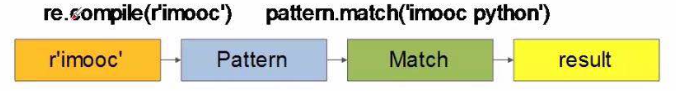

        re.I: 对大小写不敏感
        re.M: 多行匹配， 影响^和$
        re.S: 使 . 匹配换行在内的所有字符
        re.U: 根据Unicode字符集解析字符。这个标志影响\w, \W, \b, \B
        re.L: 做本地识别匹配

In [1]:
import re
# import nltk

### r'正则表达式'
这是正则表达式的习惯表达方式。加不加没啥区别。。。

In [6]:
re.findall(r'\d', '3faf23fdf4')

['3', '2', '3', '4']

In [5]:
re.findall('\d', '3faf23fdf4')

['3', '2', '3', '4']

In [4]:
re.findall('\\d', '3faf23fdf4')

['3', '2', '3', '4']

### 贪婪匹配

`*`、`+`限定符都是贪婪的，因为它们会尽可能多的匹配文字，只有在它们的后面加上一个?就可以实现非贪婪或最小匹配。

In [7]:
re.findall(r'<.*>', '<H1>Chapter 1 - 介绍正则表达式</H1>')

['<H1>Chapter 1 - 介绍正则表达式</H1>']

In [8]:
re.findall(r'<.*?>', '<H1>Chapter 1 - 介绍正则表达式</H1>')

['<H1>', '</H1>']

In [9]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|s|es|ment)$', 'processes')

[('processe', 's')]

In [10]:
re.findall(r'^(.*?)(ing|ly|ed|ious|ies|ive|s|es|ment)$', 'processes')

[('process', 'es')]

In [11]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

### (?: re)	类似 (...), 但是不表示一个组

In [ ]:
如下面的例子，会直接找出匹配的括号里的内容 作为最后的结果

In [2]:
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['ing']

In [3]:
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

['processing']

In [6]:
def t(s):
    s = re.findall(r'^(上海|北京|广州|乌鲁木齐|深圳|黑龙江|广东|连云港|(.+?[省市县]))', s)
    return s

In [7]:
t('广州军地医疗中心')

[('广州', '')]

In [4]:
def t(s):
    s = re.findall(r'^(上海|北京|广州|乌鲁木齐|深圳|黑龙江|广东|连云港|(?:.+?[省市县]))', s)
    return s

In [5]:
t('广州军地医疗中心')

['广州']

### 匹配中文符号
在pattern表达式中输入相应的符号是匹配不成功的，需要用以下Unicode表示

In [325]:
'\u3001'

'、'

In [322]:
'\u3002\uff1b\uff0c\uff1a\u201c\u201d\uff08\uff09\u3001\uff1f\u300a\u300b'

'。；，：“”（）、？《》'

# api

## 生成pattern对象

re.DOTALL 可以让正则表达式中的点（.）匹配包括换行符在内的任意字符

In [31]:
pattern = re.compile(r'a.+b', flags=re.DOTALL)

re.findall(pattern, """a
           b""")

['a\n           b']

In [30]:
pattern = re.compile(r'a.+b')

re.findall(pattern, """a
           b""")

[]

## nltk.re_show(regexp, string, left='{', right='}')

In [2]:
nltk.re_show(r'[a-zA-Z]{1,2}', '12fFdsDFDS3rtG4')

12{fF}{ds}{DF}{DS}3{rt}{G}4


## \w匹配字母、数字、下划线。注意不会匹配到中英文标点符号

In [3]:
nltk.re_show(r'\w+', '12fFdsD.FDS3rtG4')

{12fFdsD}.{FDS3rtG4}


In [4]:
nltk.re_show(r'\w+', 'ian说：你好，我（ian）是ian_luo。hi, nice to meet u!')

{ian说}：{你好}，{我}（{ian}）{是ian_luo}。{hi}, {nice} {to} {meet} {u}!


## match & search 
match 和search的区别是从字符串开头开始匹配，如果开头匹配不到，则返回None  
        Try to apply the pattern at the start of the string, returning
        a match object, or None if no match was found.

In [19]:
re.match(r'肚子|小腹|上腹|下腹|腹部|肚|腹','我腹疼啊腹好痛')

In [15]:
re.search(r'肚子|小腹|上腹|下腹|腹部|肚|腹','我腹疼啊腹好痛')

<re.Match object; span=(1, 2), match='腹'>

In [16]:
re.search(r'肚子|小腹|上腹|下腹|腹部|肚|腹','我腹疼啊腹好痛').span()

(1, 2)

In [17]:
re.search(r'肚子|小腹|上腹|下腹|腹部|肚|腹','我腹疼啊腹好痛').group()

'腹'

## findall

In [6]:
re.findall('([ⅰ]+)','ⅰ ⅱ')

['ⅰ']

In [7]:
re.findall('([s|rf]+)','12fFdsDFDS3rtG4')

['f', 's', 'r']

In [9]:
re.findall('([srf]+)','12fFdsDFDS3rtG4')

['f', 's', 'r']

In [10]:
re.findall('([a-zA-Z]+)','12fFdsDFDS3rtG4')

['fFdsDFDS', 'rtG']

In [11]:
re.findall('[a-zA-Z]+','12fFdsDFDS3rtG4')

['fFdsDFDS', 'rtG']

In [24]:
re.findall('(\d)\s+(\d)','12 3fFdsDFDS3 4rtG4')

[('2', '3'), ('3', '4')]

## sub subn

In [12]:
re.subn(r' ','_', '1 2 2 3 4')

('1_2_2_3_4', 4)

In [13]:
re.sub(r' ', '_', '1 2 2 3 4')

'1_2_2_3_4'

## split

In [20]:
re.split(r' ', '1 2 2 3 4')

['1', '2', '2', '3', '4']

In [14]:
re.split(r' ', '1 2 2 3 4', maxsplit=2)

['1', '2', '2 3 4']

In [23]:
re.split(r'[，。！？、]/[bems]', 'a。/bc，/e')

['a', 'c', '']

# examples

## 同义词替换 match search

In [5]:
fubu = ['肚子', '小腹', '上腹', '下腹', '腹部', '肚', '腹']
jinbu = ['脖子', '头颈', '脖颈', '脖梗', '颈部', '颈椎', '颈', '脖']
yanhou = ['扁桃体', '嗓子', '喉咙', '咽喉', '食管', '喉结', '声带', '咽', '喉']
nanxsz = ['男性生殖', '睾丸', '包皮', '阴茎', '阴囊', '鸡鸡', '龟头', '精']
nvxsz = ['女性生殖', '产褥期', '排卵期', '阴道', '白带', '经期', '月经', '闭经', '会阴', '子宫']
penqiang = ['尿道', '盆腔', '耻骨', '髋']
beibu = ['脊柱', '背脊', '背部', '背']
tunbu = ['肛门', '臀部', '屁股', '屁', '臀', '髋']
yaobu = ['肾区', '腰部', '腰']
daxiaobian = ['大小便', '大便', '小便', '屎', '尿']
pattern = re.compile(r'|'.join(fubu))
r = re.search(r'肚子|小腹|上腹|下腹|腹部|肚|腹', '我腹疼啊腹好痛')
print(r)#<_sre.SRE_Match object; span=(1, 2), match='腹'>
print(r.span())#(1, 2)
print(r.group())#腹
r = re.match(r'肚子|小腹|上腹|下腹|腹部|肚|腹', '我腹疼啊腹好痛')
print(r)#None
print(re.match(r'肚子|小腹|上腹|下腹|腹部|肚|腹','腹疼啊腹好痛'))#<_sre.SRE_Match object; span=(0, 1), match='腹'>


<re.Match object; span=(1, 2), match='腹'>
(1, 2)
腹
None
<re.Match object; span=(0, 1), match='腹'>
